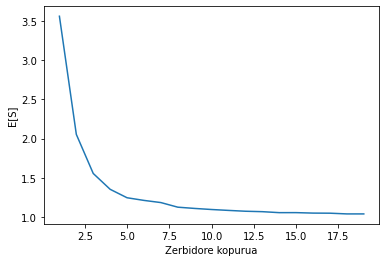

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from math import factorial
import scipy.stats as st

def MMc_g(bezero_kopurua,lambda_,c,zer_den):
    #bezeroen iritsiera denborak
    ir_a_den=[]
    for i in range(bezero_kopurua):
        ir_a_den.append(
            np.random.exponential(1/lambda_))

    iritsi_den=[]
    for i in range(bezero_kopurua):
        if i==0:
            iritsi_den.append(ir_a_den[i])
        else:
            iritsi_den.append(iritsi_den[i-1]
                              +ir_a_den[i])


    bezero_indizea=0
    sojourn=0
    irteera_denbora=[-1 for i in range(c)]
    soj=[]
    itxaron_denbora=[]


    while bezero_indizea<bezero_kopurua:
        zerbitzuan_sartu=False 
        for i in range(c): #ikusi ilara dagoen 
            if (iritsi_den[bezero_indizea]
                >irteera_denbora[i]):
                zerbitzuan_sartu=True 
                itxaron_denbora.append(0)
                soj.append(zer_den[bezero_indizea])
                irteera_denbora[i]=(
                    iritsi_den[bezero_indizea]
                                +soj[bezero_indizea])
                break  
        if not zerbitzuan_sartu: #ilara dago
            zerbitzaria=np.argmin(irteera_denbora)
            itxaron_denbora.append(
                irteera_denbora[zerbitzaria]
                            -iritsi_den[bezero_indizea])
            soj.append(zer_den[bezero_indizea]
                       +itxaron_denbora[bezero_indizea])
            irteera_denbora[zerbitzaria]=(
                iritsi_den[bezero_indizea]
                                    +soj[bezero_indizea])
        bezero_indizea+=1
    
    ES=statistics.mean(soj)

   
    return ES

mu=1
#zerbitzu denbora
zer_den=[]
for i in range(10**7):
    den=np.random.exponential(1/mu)
    zer_den.append(den)

indizea=[]
ES=[]

for i in range(1,30):
    indizea.append(i)
    ES.append(MMc_g(10**7,0.7*i,i,zer_den))
    
plt.plot(indizea,ES)
plt.xlabel('Zerbidore kopurua')
plt.ylabel('E[S]' )
plt.savefig('MMcc_aldatupruaba.pdf')